# Detached
## One hiden layer One-dimension input

In [2]:
import numpy as np
import random
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

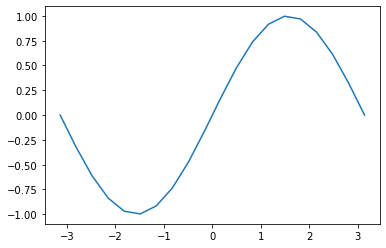

In [9]:
Nmin=-np.pi
Nmax=np.pi
N=20

class MyDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        sample = {'data': float(self.data[idx]), 'label': self.label[idx]}
        return sample

    
def fun(x):
    return np.sin(x)


data=np.linspace(Nmin, Nmax, num=N)
label=fun(data)

train_data=data
train_label=label

plt.plot(train_data,train_label)




In [10]:
train_loader = torch.utils.data.DataLoader(dataset=MyDataset(train_data,train_label), 
                                           batch_size=N, 
                                           shuffle=False)

In [62]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 1
hidden_size1 = 200
hidden_size2 = 201
hidden_size3= 203
num_classes = 1
num_epochs = 1000
batch_size = N
learning_rate = 0.01




class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1,hidden_size2,hidden_size3, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2) 
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3) 
        self.relu3 = nn.ReLU()
        
        
        self.fc4 = nn.Linear(hidden_size3, num_classes,bias=False)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        
        #out = out/np.sqrt(hidden_size1)
        return out
model = NeuralNet(input_size, hidden_size1,hidden_size2,hidden_size3, num_classes).to(device)

criterion=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
delta=-100
with torch.no_grad():
    for i in range(hidden_size1):
        if delta>0:
            model.fc2.weight[0,i]=np.random.normal(0, 0.1)
            model.fc1.weight[i,0]=np.random.normal(0, delta)
            model.fc1.bias[i]=np.random.normal(0, delta)

        if delta<0:
            #model.fc2.weight[0,i]=np.random.normal(0, -delta)
            model.fc2.weight[0,i]=delta*np.sign(np.random.normal(0, -delta))
            model.fc1.weight[i,0]=np.random.normal(0, 0.1)
            model.fc1.bias[i]=np.random.normal(0, 0.1)

tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(10

tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(

tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
tensor(100.0000)
tensor(100.0000)
tensor(100.)
te

In [6]:
delta=10.0
with torch.no_grad():
    for i in range(hidden_size1):
        dd= model.fc1.weight[i,0]*model.fc1.weight[i,0]+model.fc1.bias[i]*model.fc1.bias[i]-model.fc2.weight[0,i]*model.fc2.weight[0,i]
        model.fc1.weight[i,0]=model.fc1.weight[i,0]/np.sqrt(dd)*np.sqrt(delta)
        model.fc1.bias[i]=model.fc1.bias[i]/np.sqrt(dd)*np.sqrt(delta)
        model.fc2.weight[0,i]=model.fc2.weight[0,i]/np.sqrt(dd)*np.sqrt(delta)

In [63]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):  
        # Move tensors to the configured device
        images = data['data'].reshape(-1, 1).to(device).float()
        labels = data['label'].reshape(-1, 1).to(device).float()


        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        delta=get_delta(model,2,1)
        if (i+1) % 1 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Delta: Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item(), delta))



Epoch [1/1000], Step [1/1], Loss: 0.5115, Delta: Loss: 0.0345
Epoch [2/1000], Step [1/1], Loss: 0.4761, Delta: Loss: 0.0345
Epoch [3/1000], Step [1/1], Loss: 0.4455, Delta: Loss: 0.0345
Epoch [4/1000], Step [1/1], Loss: 0.4183, Delta: Loss: 0.0345
Epoch [5/1000], Step [1/1], Loss: 0.3941, Delta: Loss: 0.0345
Epoch [6/1000], Step [1/1], Loss: 0.3727, Delta: Loss: 0.0345
Epoch [7/1000], Step [1/1], Loss: 0.3536, Delta: Loss: 0.0345
Epoch [8/1000], Step [1/1], Loss: 0.3366, Delta: Loss: 0.0345
Epoch [9/1000], Step [1/1], Loss: 0.3213, Delta: Loss: 0.0345
Epoch [10/1000], Step [1/1], Loss: 0.3077, Delta: Loss: 0.0345
Epoch [11/1000], Step [1/1], Loss: 0.2954, Delta: Loss: 0.0345
Epoch [12/1000], Step [1/1], Loss: 0.2842, Delta: Loss: 0.0345
Epoch [13/1000], Step [1/1], Loss: 0.2740, Delta: Loss: 0.0345
Epoch [14/1000], Step [1/1], Loss: 0.2647, Delta: Loss: 0.0345
Epoch [15/1000], Step [1/1], Loss: 0.2563, Delta: Loss: 0.0345
Epoch [16/1000], Step [1/1], Loss: 0.2487, Delta: Loss: 0.0345
E

Epoch [138/1000], Step [1/1], Loss: 0.0829, Delta: Loss: 0.0345
Epoch [139/1000], Step [1/1], Loss: 0.0821, Delta: Loss: 0.0345
Epoch [140/1000], Step [1/1], Loss: 0.0813, Delta: Loss: 0.0345
Epoch [141/1000], Step [1/1], Loss: 0.0805, Delta: Loss: 0.0345
Epoch [142/1000], Step [1/1], Loss: 0.0797, Delta: Loss: 0.0345
Epoch [143/1000], Step [1/1], Loss: 0.0790, Delta: Loss: 0.0345
Epoch [144/1000], Step [1/1], Loss: 0.0782, Delta: Loss: 0.0345
Epoch [145/1000], Step [1/1], Loss: 0.0774, Delta: Loss: 0.0345
Epoch [146/1000], Step [1/1], Loss: 0.0766, Delta: Loss: 0.0345
Epoch [147/1000], Step [1/1], Loss: 0.0758, Delta: Loss: 0.0345
Epoch [148/1000], Step [1/1], Loss: 0.0751, Delta: Loss: 0.0345
Epoch [149/1000], Step [1/1], Loss: 0.0743, Delta: Loss: 0.0345
Epoch [150/1000], Step [1/1], Loss: 0.0735, Delta: Loss: 0.0345
Epoch [151/1000], Step [1/1], Loss: 0.0728, Delta: Loss: 0.0345
Epoch [152/1000], Step [1/1], Loss: 0.0720, Delta: Loss: 0.0345
Epoch [153/1000], Step [1/1], Loss: 0.07

Epoch [278/1000], Step [1/1], Loss: 0.0197, Delta: Loss: 0.0345
Epoch [279/1000], Step [1/1], Loss: 0.0195, Delta: Loss: 0.0345
Epoch [280/1000], Step [1/1], Loss: 0.0194, Delta: Loss: 0.0345
Epoch [281/1000], Step [1/1], Loss: 0.0192, Delta: Loss: 0.0345
Epoch [282/1000], Step [1/1], Loss: 0.0191, Delta: Loss: 0.0345
Epoch [283/1000], Step [1/1], Loss: 0.0189, Delta: Loss: 0.0345
Epoch [284/1000], Step [1/1], Loss: 0.0188, Delta: Loss: 0.0345
Epoch [285/1000], Step [1/1], Loss: 0.0186, Delta: Loss: 0.0345
Epoch [286/1000], Step [1/1], Loss: 0.0185, Delta: Loss: 0.0345
Epoch [287/1000], Step [1/1], Loss: 0.0184, Delta: Loss: 0.0345
Epoch [288/1000], Step [1/1], Loss: 0.0182, Delta: Loss: 0.0345
Epoch [289/1000], Step [1/1], Loss: 0.0181, Delta: Loss: 0.0345
Epoch [290/1000], Step [1/1], Loss: 0.0180, Delta: Loss: 0.0345
Epoch [291/1000], Step [1/1], Loss: 0.0178, Delta: Loss: 0.0345
Epoch [292/1000], Step [1/1], Loss: 0.0177, Delta: Loss: 0.0345
Epoch [293/1000], Step [1/1], Loss: 0.01

Epoch [419/1000], Step [1/1], Loss: 0.0079, Delta: Loss: 0.0345
Epoch [420/1000], Step [1/1], Loss: 0.0078, Delta: Loss: 0.0345
Epoch [421/1000], Step [1/1], Loss: 0.0078, Delta: Loss: 0.0345
Epoch [422/1000], Step [1/1], Loss: 0.0077, Delta: Loss: 0.0345
Epoch [423/1000], Step [1/1], Loss: 0.0077, Delta: Loss: 0.0345
Epoch [424/1000], Step [1/1], Loss: 0.0076, Delta: Loss: 0.0345
Epoch [425/1000], Step [1/1], Loss: 0.0076, Delta: Loss: 0.0345
Epoch [426/1000], Step [1/1], Loss: 0.0076, Delta: Loss: 0.0345
Epoch [427/1000], Step [1/1], Loss: 0.0075, Delta: Loss: 0.0345
Epoch [428/1000], Step [1/1], Loss: 0.0075, Delta: Loss: 0.0345
Epoch [429/1000], Step [1/1], Loss: 0.0074, Delta: Loss: 0.0345
Epoch [430/1000], Step [1/1], Loss: 0.0074, Delta: Loss: 0.0345
Epoch [431/1000], Step [1/1], Loss: 0.0074, Delta: Loss: 0.0345
Epoch [432/1000], Step [1/1], Loss: 0.0073, Delta: Loss: 0.0345
Epoch [433/1000], Step [1/1], Loss: 0.0073, Delta: Loss: 0.0345
Epoch [434/1000], Step [1/1], Loss: 0.00

Epoch [558/1000], Step [1/1], Loss: 0.0038, Delta: Loss: 0.0345
Epoch [559/1000], Step [1/1], Loss: 0.0038, Delta: Loss: 0.0345
Epoch [560/1000], Step [1/1], Loss: 0.0037, Delta: Loss: 0.0345
Epoch [561/1000], Step [1/1], Loss: 0.0037, Delta: Loss: 0.0345
Epoch [562/1000], Step [1/1], Loss: 0.0037, Delta: Loss: 0.0345
Epoch [563/1000], Step [1/1], Loss: 0.0037, Delta: Loss: 0.0345
Epoch [564/1000], Step [1/1], Loss: 0.0037, Delta: Loss: 0.0345
Epoch [565/1000], Step [1/1], Loss: 0.0037, Delta: Loss: 0.0345
Epoch [566/1000], Step [1/1], Loss: 0.0036, Delta: Loss: 0.0345
Epoch [567/1000], Step [1/1], Loss: 0.0036, Delta: Loss: 0.0345
Epoch [568/1000], Step [1/1], Loss: 0.0036, Delta: Loss: 0.0345
Epoch [569/1000], Step [1/1], Loss: 0.0036, Delta: Loss: 0.0345
Epoch [570/1000], Step [1/1], Loss: 0.0036, Delta: Loss: 0.0345
Epoch [571/1000], Step [1/1], Loss: 0.0036, Delta: Loss: 0.0345
Epoch [572/1000], Step [1/1], Loss: 0.0035, Delta: Loss: 0.0345
Epoch [573/1000], Step [1/1], Loss: 0.00

Epoch [695/1000], Step [1/1], Loss: 0.0021, Delta: Loss: 0.0345
Epoch [696/1000], Step [1/1], Loss: 0.0021, Delta: Loss: 0.0345
Epoch [697/1000], Step [1/1], Loss: 0.0021, Delta: Loss: 0.0345
Epoch [698/1000], Step [1/1], Loss: 0.0021, Delta: Loss: 0.0345
Epoch [699/1000], Step [1/1], Loss: 0.0021, Delta: Loss: 0.0345
Epoch [700/1000], Step [1/1], Loss: 0.0021, Delta: Loss: 0.0345
Epoch [701/1000], Step [1/1], Loss: 0.0021, Delta: Loss: 0.0345
Epoch [702/1000], Step [1/1], Loss: 0.0020, Delta: Loss: 0.0345
Epoch [703/1000], Step [1/1], Loss: 0.0020, Delta: Loss: 0.0345
Epoch [704/1000], Step [1/1], Loss: 0.0020, Delta: Loss: 0.0345
Epoch [705/1000], Step [1/1], Loss: 0.0020, Delta: Loss: 0.0345
Epoch [706/1000], Step [1/1], Loss: 0.0020, Delta: Loss: 0.0345
Epoch [707/1000], Step [1/1], Loss: 0.0020, Delta: Loss: 0.0345
Epoch [708/1000], Step [1/1], Loss: 0.0020, Delta: Loss: 0.0345
Epoch [709/1000], Step [1/1], Loss: 0.0020, Delta: Loss: 0.0345
Epoch [710/1000], Step [1/1], Loss: 0.00

Epoch [833/1000], Step [1/1], Loss: 0.0013, Delta: Loss: 0.0345
Epoch [834/1000], Step [1/1], Loss: 0.0013, Delta: Loss: 0.0345
Epoch [835/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [836/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [837/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [838/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [839/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [840/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [841/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [842/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [843/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [844/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [845/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [846/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [847/1000], Step [1/1], Loss: 0.0012, Delta: Loss: 0.0345
Epoch [848/1000], Step [1/1], Loss: 0.00

Epoch [971/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [972/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [973/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [974/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [975/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [976/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [977/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [978/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [979/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [980/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [981/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [982/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [983/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [984/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [985/1000], Step [1/1], Loss: 0.0008, Delta: Loss: 0.0345
Epoch [986/1000], Step [1/1], Loss: 0.00

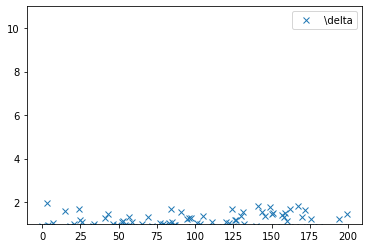

In [15]:
ddd=np.zeros(hidden_size1)
with torch.no_grad():
    for i in range(hidden_size1):
        dd= model.fc1.weight[i,0]*model.fc1.weight[i,0]+model.fc1.bias[i]*model.fc1.bias[i]-model.fc2.weight[0,i]*model.fc2.weight[0,i]
        ddd[i]=dd
plt.plot(ddd,'x',label=r'\delta')
plt.ylim([1, 11])
plt.savefig('del.pdf')
plt.legend()

plt.show()

In [16]:
def fline(model, Nmin, Nmax, num=100):
    x=np.zeros(num)
    y=np.zeros(num)
    d=1.*(Nmax-Nmin)/num
    with torch.no_grad():
        for i in range(num):
            x[i]=Nmin+i*d
            xx=torch.tensor(Nmin+i*d).reshape(-1, 1).to(device).float()
            y[i]=model(xx).numpy()
            
    return x,y
        

In [17]:

 
blank = ' '
print('-----------------------------------------------')
print('|   weight name   |        weight shape       |')
print('-----------------------------------------------')

for index, (key, w_variable) in enumerate(model.named_parameters()):
    if len(key)<=15: key = key + (15-len(key))*blank
    w_variable_blank = ''
    if len(w_variable.shape) == 1:
        if w_variable.shape[0] >= 100: w_variable_blank = 8*blank
        else: w_variable_blank = 9*blank
    elif len(w_variable.shape) == 2:
        if w_variable.shape[0] >= 100: w_variable_blank = 2*blank
        else: w_variable_blank = 3*blank
 
    print('| {} | {}{} |'.format(key, w_variable.shape, w_variable_blank))
    key = 0
print('-----------------------------------------------')


-----------------------------------------------
|   weight name   |        weight shape       |
-----------------------------------------------
| fc1.weight      | torch.Size([200, 1])   |
| fc1.bias        | torch.Size([200])         |
| fc2.weight      | torch.Size([201, 200])   |
| fc2.bias        | torch.Size([201])         |
| fc3.weight      | torch.Size([203, 201])   |
| fc3.bias        | torch.Size([203])         |
| fc4.weight      | torch.Size([1, 203])    |
-----------------------------------------------


In [60]:
def get_delta(model,layer,i):
    name_weight_1='fc'+str(layer)+'.weight'
    name_bias_1='fc'+str(layer)+'.bias'
    name_weight_2='fc'+str(layer+1)+'.weight'
    with torch.no_grad():
        weight_1=model.state_dict()[name_weight_1].numpy()[i]
        bias_1=model.state_dict()[name_bias_1].numpy()[i]
        weight_2=model.state_dict()[name_weight_2].numpy().T[i]
        delta=np.linalg.norm(weight_1)**2+np.linalg.norm(bias_1)**2-np.linalg.norm(weight_2)**2
    return delta
get_delta(model,2,1)

-0.05862872664883301

In [18]:
b=model.state_dict()['fc1.weight'].numpy().reshape(-1)
c=model.state_dict()['fc1.bias'].numpy().reshape(-1)

In [19]:
d=-c/b

In [20]:
y_d= np.zeros(len(d))
with torch.no_grad():
    for i in range(len(d)):
        xx=torch.tensor(d[i]).reshape(-1, 1).to(device).float()
        y_d[i]=model(xx).numpy()

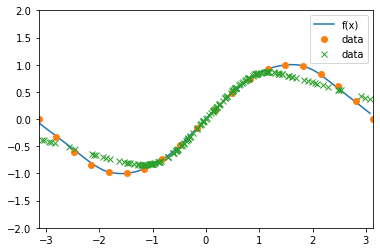

In [64]:
x,y=fline(model,Nmin, Nmax)

plt.plot(x,y,label='f(x)')
plt.plot(train_data,train_label,'o',label='data')
plt.plot(d,y_d,'x',label='data')

plt.xlim([Nmin, Nmax])
plt.ylim([-2, 2])
plt.savefig('1delta100.pdf')
plt.legend()
plt.show()

# One hiden layer multi input

In [160]:
import numpy as np
import random
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

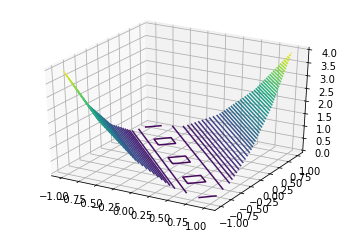

In [170]:
Nmin=-1
Nmax=1
N=5

class MyDataset(Dataset):
    def __init__(self, data, label):
        self.data = data
        self.label = label

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        
        sample = {'data': self.data[idx], 'label': self.label[idx]}
        return sample

    
def fun(x,y):
    return (x+y)**2

data=[]
label=[]
for x in np.linspace(Nmin, Nmax, num=N):
    for y in np.linspace(Nmin, Nmax, num=N):
        data.append([x,y])
        label.append([fun(x,y)])
        

train_data=np.array(data)
train_label=np.array(label)



x = np.linspace(Nmin, Nmax, num=N)
y = np.linspace(Nmin, Nmax, num=N)

X, Y = np.meshgrid(x, y)
Z = fun(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)



In [171]:
train_loader = torch.utils.data.DataLoader(dataset=MyDataset(train_data,train_label), 
                                           batch_size=N*N, 
                                           shuffle=False)

In [188]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
input_size = 2
hidden_size1 = 100
num_classes = 1
num_epochs = 10000
batch_size = N*N
learning_rate = 0.05




class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size1, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1) 
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, num_classes,bias=False)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        #out = out/np.sqrt(hidden_size1)
        out = out/hidden_size1
        return out
model = NeuralNet(input_size, hidden_size1, num_classes).to(device)

criterion=nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [189]:
deltaa=-10
delta=-deltaa
with torch.no_grad():
    for i in range(hidden_size1):
        if delta>0:
            model.fc2.weight[0,i]=np.random.normal(0, 0.01)
            model.fc1.weight[i,0]=np.random.normal(0, delta)
            model.fc1.weight[i,1]=np.random.normal(0, delta)
            model.fc1.bias[i]=np.random.normal(0, delta)

        if delta<0:
            model.fc2.weight[0,i]=np.random.normal(0, -delta)
            #model.fc2.weight[0,i]=delta*np.sign(np.random.normal(0, -delta))
            model.fc1.weight[i,0]=np.random.normal(0, 0.01)
            model.fc1.weight[i,1]=np.random.normal(0, 0.01)
            model.fc1.bias[i]=np.random.normal(0, 0.01)


In [190]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):  
        # Move tensors to the configured device
        images = data['data'].reshape(-1, 2).to(device).float()
        labels = data['label'].reshape(-1, 1).to(device).float()


        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 1 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/10000], Step [1/1], Loss: 2.3473
Epoch [2/10000], Step [1/1], Loss: 2.1963
Epoch [3/10000], Step [1/1], Loss: 2.0656
Epoch [4/10000], Step [1/1], Loss: 1.9523
Epoch [5/10000], Step [1/1], Loss: 1.8541
Epoch [6/10000], Step [1/1], Loss: 1.7690
Epoch [7/10000], Step [1/1], Loss: 1.6950
Epoch [8/10000], Step [1/1], Loss: 1.6308
Epoch [9/10000], Step [1/1], Loss: 1.5749
Epoch [10/10000], Step [1/1], Loss: 1.5261
Epoch [11/10000], Step [1/1], Loss: 1.4836
Epoch [12/10000], Step [1/1], Loss: 1.4465
Epoch [13/10000], Step [1/1], Loss: 1.4140
Epoch [14/10000], Step [1/1], Loss: 1.3854
Epoch [15/10000], Step [1/1], Loss: 1.3603
Epoch [16/10000], Step [1/1], Loss: 1.3382
Epoch [17/10000], Step [1/1], Loss: 1.3186
Epoch [18/10000], Step [1/1], Loss: 1.3013
Epoch [19/10000], Step [1/1], Loss: 1.2858
Epoch [20/10000], Step [1/1], Loss: 1.2720
Epoch [21/10000], Step [1/1], Loss: 1.2597
Epoch [22/10000], Step [1/1], Loss: 1.2485
Epoch [23/10000], Step [1/1], Loss: 1.2385
Epoch [24/10000], St

Epoch [233/10000], Step [1/1], Loss: 0.6705
Epoch [234/10000], Step [1/1], Loss: 0.6687
Epoch [235/10000], Step [1/1], Loss: 0.6669
Epoch [236/10000], Step [1/1], Loss: 0.6651
Epoch [237/10000], Step [1/1], Loss: 0.6634
Epoch [238/10000], Step [1/1], Loss: 0.6616
Epoch [239/10000], Step [1/1], Loss: 0.6598
Epoch [240/10000], Step [1/1], Loss: 0.6580
Epoch [241/10000], Step [1/1], Loss: 0.6563
Epoch [242/10000], Step [1/1], Loss: 0.6545
Epoch [243/10000], Step [1/1], Loss: 0.6527
Epoch [244/10000], Step [1/1], Loss: 0.6510
Epoch [245/10000], Step [1/1], Loss: 0.6492
Epoch [246/10000], Step [1/1], Loss: 0.6475
Epoch [247/10000], Step [1/1], Loss: 0.6458
Epoch [248/10000], Step [1/1], Loss: 0.6440
Epoch [249/10000], Step [1/1], Loss: 0.6423
Epoch [250/10000], Step [1/1], Loss: 0.6406
Epoch [251/10000], Step [1/1], Loss: 0.6389
Epoch [252/10000], Step [1/1], Loss: 0.6372
Epoch [253/10000], Step [1/1], Loss: 0.6355
Epoch [254/10000], Step [1/1], Loss: 0.6337
Epoch [255/10000], Step [1/1], L

Epoch [479/10000], Step [1/1], Loss: 0.3510
Epoch [480/10000], Step [1/1], Loss: 0.3501
Epoch [481/10000], Step [1/1], Loss: 0.3492
Epoch [482/10000], Step [1/1], Loss: 0.3483
Epoch [483/10000], Step [1/1], Loss: 0.3474
Epoch [484/10000], Step [1/1], Loss: 0.3465
Epoch [485/10000], Step [1/1], Loss: 0.3457
Epoch [486/10000], Step [1/1], Loss: 0.3448
Epoch [487/10000], Step [1/1], Loss: 0.3439
Epoch [488/10000], Step [1/1], Loss: 0.3430
Epoch [489/10000], Step [1/1], Loss: 0.3421
Epoch [490/10000], Step [1/1], Loss: 0.3413
Epoch [491/10000], Step [1/1], Loss: 0.3404
Epoch [492/10000], Step [1/1], Loss: 0.3395
Epoch [493/10000], Step [1/1], Loss: 0.3387
Epoch [494/10000], Step [1/1], Loss: 0.3378
Epoch [495/10000], Step [1/1], Loss: 0.3369
Epoch [496/10000], Step [1/1], Loss: 0.3361
Epoch [497/10000], Step [1/1], Loss: 0.3352
Epoch [498/10000], Step [1/1], Loss: 0.3344
Epoch [499/10000], Step [1/1], Loss: 0.3335
Epoch [500/10000], Step [1/1], Loss: 0.3327
Epoch [501/10000], Step [1/1], L

Epoch [736/10000], Step [1/1], Loss: 0.1869
Epoch [737/10000], Step [1/1], Loss: 0.1865
Epoch [738/10000], Step [1/1], Loss: 0.1861
Epoch [739/10000], Step [1/1], Loss: 0.1856
Epoch [740/10000], Step [1/1], Loss: 0.1852
Epoch [741/10000], Step [1/1], Loss: 0.1848
Epoch [742/10000], Step [1/1], Loss: 0.1843
Epoch [743/10000], Step [1/1], Loss: 0.1839
Epoch [744/10000], Step [1/1], Loss: 0.1835
Epoch [745/10000], Step [1/1], Loss: 0.1831
Epoch [746/10000], Step [1/1], Loss: 0.1827
Epoch [747/10000], Step [1/1], Loss: 0.1822
Epoch [748/10000], Step [1/1], Loss: 0.1818
Epoch [749/10000], Step [1/1], Loss: 0.1814
Epoch [750/10000], Step [1/1], Loss: 0.1810
Epoch [751/10000], Step [1/1], Loss: 0.1806
Epoch [752/10000], Step [1/1], Loss: 0.1801
Epoch [753/10000], Step [1/1], Loss: 0.1797
Epoch [754/10000], Step [1/1], Loss: 0.1793
Epoch [755/10000], Step [1/1], Loss: 0.1789
Epoch [756/10000], Step [1/1], Loss: 0.1785
Epoch [757/10000], Step [1/1], Loss: 0.1781
Epoch [758/10000], Step [1/1], L

Epoch [974/10000], Step [1/1], Loss: 0.1115
Epoch [975/10000], Step [1/1], Loss: 0.1113
Epoch [976/10000], Step [1/1], Loss: 0.1110
Epoch [977/10000], Step [1/1], Loss: 0.1108
Epoch [978/10000], Step [1/1], Loss: 0.1106
Epoch [979/10000], Step [1/1], Loss: 0.1104
Epoch [980/10000], Step [1/1], Loss: 0.1102
Epoch [981/10000], Step [1/1], Loss: 0.1099
Epoch [982/10000], Step [1/1], Loss: 0.1097
Epoch [983/10000], Step [1/1], Loss: 0.1095
Epoch [984/10000], Step [1/1], Loss: 0.1093
Epoch [985/10000], Step [1/1], Loss: 0.1091
Epoch [986/10000], Step [1/1], Loss: 0.1089
Epoch [987/10000], Step [1/1], Loss: 0.1086
Epoch [988/10000], Step [1/1], Loss: 0.1084
Epoch [989/10000], Step [1/1], Loss: 0.1082
Epoch [990/10000], Step [1/1], Loss: 0.1080
Epoch [991/10000], Step [1/1], Loss: 0.1078
Epoch [992/10000], Step [1/1], Loss: 0.1076
Epoch [993/10000], Step [1/1], Loss: 0.1074
Epoch [994/10000], Step [1/1], Loss: 0.1071
Epoch [995/10000], Step [1/1], Loss: 0.1069
Epoch [996/10000], Step [1/1], L

Epoch [1229/10000], Step [1/1], Loss: 0.0705
Epoch [1230/10000], Step [1/1], Loss: 0.0704
Epoch [1231/10000], Step [1/1], Loss: 0.0703
Epoch [1232/10000], Step [1/1], Loss: 0.0702
Epoch [1233/10000], Step [1/1], Loss: 0.0701
Epoch [1234/10000], Step [1/1], Loss: 0.0700
Epoch [1235/10000], Step [1/1], Loss: 0.0699
Epoch [1236/10000], Step [1/1], Loss: 0.0697
Epoch [1237/10000], Step [1/1], Loss: 0.0696
Epoch [1238/10000], Step [1/1], Loss: 0.0695
Epoch [1239/10000], Step [1/1], Loss: 0.0694
Epoch [1240/10000], Step [1/1], Loss: 0.0693
Epoch [1241/10000], Step [1/1], Loss: 0.0692
Epoch [1242/10000], Step [1/1], Loss: 0.0691
Epoch [1243/10000], Step [1/1], Loss: 0.0690
Epoch [1244/10000], Step [1/1], Loss: 0.0689
Epoch [1245/10000], Step [1/1], Loss: 0.0688
Epoch [1246/10000], Step [1/1], Loss: 0.0687
Epoch [1247/10000], Step [1/1], Loss: 0.0686
Epoch [1248/10000], Step [1/1], Loss: 0.0684
Epoch [1249/10000], Step [1/1], Loss: 0.0683
Epoch [1250/10000], Step [1/1], Loss: 0.0682
Epoch [125

Epoch [1463/10000], Step [1/1], Loss: 0.0510
Epoch [1464/10000], Step [1/1], Loss: 0.0509
Epoch [1465/10000], Step [1/1], Loss: 0.0509
Epoch [1466/10000], Step [1/1], Loss: 0.0508
Epoch [1467/10000], Step [1/1], Loss: 0.0507
Epoch [1468/10000], Step [1/1], Loss: 0.0507
Epoch [1469/10000], Step [1/1], Loss: 0.0506
Epoch [1470/10000], Step [1/1], Loss: 0.0506
Epoch [1471/10000], Step [1/1], Loss: 0.0505
Epoch [1472/10000], Step [1/1], Loss: 0.0504
Epoch [1473/10000], Step [1/1], Loss: 0.0504
Epoch [1474/10000], Step [1/1], Loss: 0.0503
Epoch [1475/10000], Step [1/1], Loss: 0.0503
Epoch [1476/10000], Step [1/1], Loss: 0.0502
Epoch [1477/10000], Step [1/1], Loss: 0.0502
Epoch [1478/10000], Step [1/1], Loss: 0.0501
Epoch [1479/10000], Step [1/1], Loss: 0.0500
Epoch [1480/10000], Step [1/1], Loss: 0.0500
Epoch [1481/10000], Step [1/1], Loss: 0.0499
Epoch [1482/10000], Step [1/1], Loss: 0.0499
Epoch [1483/10000], Step [1/1], Loss: 0.0498
Epoch [1484/10000], Step [1/1], Loss: 0.0497
Epoch [148

Epoch [1707/10000], Step [1/1], Loss: 0.0398
Epoch [1708/10000], Step [1/1], Loss: 0.0398
Epoch [1709/10000], Step [1/1], Loss: 0.0397
Epoch [1710/10000], Step [1/1], Loss: 0.0397
Epoch [1711/10000], Step [1/1], Loss: 0.0397
Epoch [1712/10000], Step [1/1], Loss: 0.0396
Epoch [1713/10000], Step [1/1], Loss: 0.0396
Epoch [1714/10000], Step [1/1], Loss: 0.0396
Epoch [1715/10000], Step [1/1], Loss: 0.0395
Epoch [1716/10000], Step [1/1], Loss: 0.0395
Epoch [1717/10000], Step [1/1], Loss: 0.0395
Epoch [1718/10000], Step [1/1], Loss: 0.0394
Epoch [1719/10000], Step [1/1], Loss: 0.0394
Epoch [1720/10000], Step [1/1], Loss: 0.0394
Epoch [1721/10000], Step [1/1], Loss: 0.0393
Epoch [1722/10000], Step [1/1], Loss: 0.0393
Epoch [1723/10000], Step [1/1], Loss: 0.0393
Epoch [1724/10000], Step [1/1], Loss: 0.0392
Epoch [1725/10000], Step [1/1], Loss: 0.0392
Epoch [1726/10000], Step [1/1], Loss: 0.0392
Epoch [1727/10000], Step [1/1], Loss: 0.0391
Epoch [1728/10000], Step [1/1], Loss: 0.0391
Epoch [172

Epoch [1954/10000], Step [1/1], Loss: 0.0333
Epoch [1955/10000], Step [1/1], Loss: 0.0333
Epoch [1956/10000], Step [1/1], Loss: 0.0333
Epoch [1957/10000], Step [1/1], Loss: 0.0333
Epoch [1958/10000], Step [1/1], Loss: 0.0332
Epoch [1959/10000], Step [1/1], Loss: 0.0332
Epoch [1960/10000], Step [1/1], Loss: 0.0332
Epoch [1961/10000], Step [1/1], Loss: 0.0332
Epoch [1962/10000], Step [1/1], Loss: 0.0332
Epoch [1963/10000], Step [1/1], Loss: 0.0331
Epoch [1964/10000], Step [1/1], Loss: 0.0331
Epoch [1965/10000], Step [1/1], Loss: 0.0331
Epoch [1966/10000], Step [1/1], Loss: 0.0331
Epoch [1967/10000], Step [1/1], Loss: 0.0331
Epoch [1968/10000], Step [1/1], Loss: 0.0330
Epoch [1969/10000], Step [1/1], Loss: 0.0330
Epoch [1970/10000], Step [1/1], Loss: 0.0330
Epoch [1971/10000], Step [1/1], Loss: 0.0330
Epoch [1972/10000], Step [1/1], Loss: 0.0330
Epoch [1973/10000], Step [1/1], Loss: 0.0329
Epoch [1974/10000], Step [1/1], Loss: 0.0329
Epoch [1975/10000], Step [1/1], Loss: 0.0329
Epoch [197

Epoch [2209/10000], Step [1/1], Loss: 0.0293
Epoch [2210/10000], Step [1/1], Loss: 0.0292
Epoch [2211/10000], Step [1/1], Loss: 0.0292
Epoch [2212/10000], Step [1/1], Loss: 0.0292
Epoch [2213/10000], Step [1/1], Loss: 0.0292
Epoch [2214/10000], Step [1/1], Loss: 0.0292
Epoch [2215/10000], Step [1/1], Loss: 0.0292
Epoch [2216/10000], Step [1/1], Loss: 0.0292
Epoch [2217/10000], Step [1/1], Loss: 0.0292
Epoch [2218/10000], Step [1/1], Loss: 0.0291
Epoch [2219/10000], Step [1/1], Loss: 0.0291
Epoch [2220/10000], Step [1/1], Loss: 0.0291
Epoch [2221/10000], Step [1/1], Loss: 0.0291
Epoch [2222/10000], Step [1/1], Loss: 0.0291
Epoch [2223/10000], Step [1/1], Loss: 0.0291
Epoch [2224/10000], Step [1/1], Loss: 0.0291
Epoch [2225/10000], Step [1/1], Loss: 0.0291
Epoch [2226/10000], Step [1/1], Loss: 0.0290
Epoch [2227/10000], Step [1/1], Loss: 0.0290
Epoch [2228/10000], Step [1/1], Loss: 0.0290
Epoch [2229/10000], Step [1/1], Loss: 0.0290
Epoch [2230/10000], Step [1/1], Loss: 0.0290
Epoch [223

Epoch [2466/10000], Step [1/1], Loss: 0.0266
Epoch [2467/10000], Step [1/1], Loss: 0.0266
Epoch [2468/10000], Step [1/1], Loss: 0.0266
Epoch [2469/10000], Step [1/1], Loss: 0.0266
Epoch [2470/10000], Step [1/1], Loss: 0.0266
Epoch [2471/10000], Step [1/1], Loss: 0.0266
Epoch [2472/10000], Step [1/1], Loss: 0.0266
Epoch [2473/10000], Step [1/1], Loss: 0.0266
Epoch [2474/10000], Step [1/1], Loss: 0.0265
Epoch [2475/10000], Step [1/1], Loss: 0.0265
Epoch [2476/10000], Step [1/1], Loss: 0.0265
Epoch [2477/10000], Step [1/1], Loss: 0.0265
Epoch [2478/10000], Step [1/1], Loss: 0.0265
Epoch [2479/10000], Step [1/1], Loss: 0.0265
Epoch [2480/10000], Step [1/1], Loss: 0.0265
Epoch [2481/10000], Step [1/1], Loss: 0.0265
Epoch [2482/10000], Step [1/1], Loss: 0.0265
Epoch [2483/10000], Step [1/1], Loss: 0.0265
Epoch [2484/10000], Step [1/1], Loss: 0.0265
Epoch [2485/10000], Step [1/1], Loss: 0.0265
Epoch [2486/10000], Step [1/1], Loss: 0.0264
Epoch [2487/10000], Step [1/1], Loss: 0.0264
Epoch [248

Epoch [2718/10000], Step [1/1], Loss: 0.0248
Epoch [2719/10000], Step [1/1], Loss: 0.0248
Epoch [2720/10000], Step [1/1], Loss: 0.0248
Epoch [2721/10000], Step [1/1], Loss: 0.0248
Epoch [2722/10000], Step [1/1], Loss: 0.0248
Epoch [2723/10000], Step [1/1], Loss: 0.0248
Epoch [2724/10000], Step [1/1], Loss: 0.0248
Epoch [2725/10000], Step [1/1], Loss: 0.0248
Epoch [2726/10000], Step [1/1], Loss: 0.0248
Epoch [2727/10000], Step [1/1], Loss: 0.0248
Epoch [2728/10000], Step [1/1], Loss: 0.0247
Epoch [2729/10000], Step [1/1], Loss: 0.0247
Epoch [2730/10000], Step [1/1], Loss: 0.0247
Epoch [2731/10000], Step [1/1], Loss: 0.0247
Epoch [2732/10000], Step [1/1], Loss: 0.0247
Epoch [2733/10000], Step [1/1], Loss: 0.0247
Epoch [2734/10000], Step [1/1], Loss: 0.0247
Epoch [2735/10000], Step [1/1], Loss: 0.0247
Epoch [2736/10000], Step [1/1], Loss: 0.0247
Epoch [2737/10000], Step [1/1], Loss: 0.0247
Epoch [2738/10000], Step [1/1], Loss: 0.0247
Epoch [2739/10000], Step [1/1], Loss: 0.0247
Epoch [274

Epoch [2961/10000], Step [1/1], Loss: 0.0235
Epoch [2962/10000], Step [1/1], Loss: 0.0235
Epoch [2963/10000], Step [1/1], Loss: 0.0235
Epoch [2964/10000], Step [1/1], Loss: 0.0235
Epoch [2965/10000], Step [1/1], Loss: 0.0235
Epoch [2966/10000], Step [1/1], Loss: 0.0235
Epoch [2967/10000], Step [1/1], Loss: 0.0235
Epoch [2968/10000], Step [1/1], Loss: 0.0235
Epoch [2969/10000], Step [1/1], Loss: 0.0235
Epoch [2970/10000], Step [1/1], Loss: 0.0235
Epoch [2971/10000], Step [1/1], Loss: 0.0235
Epoch [2972/10000], Step [1/1], Loss: 0.0234
Epoch [2973/10000], Step [1/1], Loss: 0.0234
Epoch [2974/10000], Step [1/1], Loss: 0.0234
Epoch [2975/10000], Step [1/1], Loss: 0.0234
Epoch [2976/10000], Step [1/1], Loss: 0.0234
Epoch [2977/10000], Step [1/1], Loss: 0.0234
Epoch [2978/10000], Step [1/1], Loss: 0.0234
Epoch [2979/10000], Step [1/1], Loss: 0.0234
Epoch [2980/10000], Step [1/1], Loss: 0.0234
Epoch [2981/10000], Step [1/1], Loss: 0.0234
Epoch [2982/10000], Step [1/1], Loss: 0.0234
Epoch [298

Epoch [3205/10000], Step [1/1], Loss: 0.0225
Epoch [3206/10000], Step [1/1], Loss: 0.0225
Epoch [3207/10000], Step [1/1], Loss: 0.0225
Epoch [3208/10000], Step [1/1], Loss: 0.0225
Epoch [3209/10000], Step [1/1], Loss: 0.0225
Epoch [3210/10000], Step [1/1], Loss: 0.0225
Epoch [3211/10000], Step [1/1], Loss: 0.0225
Epoch [3212/10000], Step [1/1], Loss: 0.0224
Epoch [3213/10000], Step [1/1], Loss: 0.0224
Epoch [3214/10000], Step [1/1], Loss: 0.0224
Epoch [3215/10000], Step [1/1], Loss: 0.0224
Epoch [3216/10000], Step [1/1], Loss: 0.0224
Epoch [3217/10000], Step [1/1], Loss: 0.0224
Epoch [3218/10000], Step [1/1], Loss: 0.0224
Epoch [3219/10000], Step [1/1], Loss: 0.0224
Epoch [3220/10000], Step [1/1], Loss: 0.0224
Epoch [3221/10000], Step [1/1], Loss: 0.0224
Epoch [3222/10000], Step [1/1], Loss: 0.0224
Epoch [3223/10000], Step [1/1], Loss: 0.0224
Epoch [3224/10000], Step [1/1], Loss: 0.0224
Epoch [3225/10000], Step [1/1], Loss: 0.0224
Epoch [3226/10000], Step [1/1], Loss: 0.0224
Epoch [322

Epoch [3447/10000], Step [1/1], Loss: 0.0216
Epoch [3448/10000], Step [1/1], Loss: 0.0216
Epoch [3449/10000], Step [1/1], Loss: 0.0216
Epoch [3450/10000], Step [1/1], Loss: 0.0216
Epoch [3451/10000], Step [1/1], Loss: 0.0216
Epoch [3452/10000], Step [1/1], Loss: 0.0216
Epoch [3453/10000], Step [1/1], Loss: 0.0216
Epoch [3454/10000], Step [1/1], Loss: 0.0216
Epoch [3455/10000], Step [1/1], Loss: 0.0216
Epoch [3456/10000], Step [1/1], Loss: 0.0216
Epoch [3457/10000], Step [1/1], Loss: 0.0216
Epoch [3458/10000], Step [1/1], Loss: 0.0216
Epoch [3459/10000], Step [1/1], Loss: 0.0216
Epoch [3460/10000], Step [1/1], Loss: 0.0216
Epoch [3461/10000], Step [1/1], Loss: 0.0216
Epoch [3462/10000], Step [1/1], Loss: 0.0216
Epoch [3463/10000], Step [1/1], Loss: 0.0216
Epoch [3464/10000], Step [1/1], Loss: 0.0216
Epoch [3465/10000], Step [1/1], Loss: 0.0216
Epoch [3466/10000], Step [1/1], Loss: 0.0216
Epoch [3467/10000], Step [1/1], Loss: 0.0216
Epoch [3468/10000], Step [1/1], Loss: 0.0216
Epoch [346

Epoch [3687/10000], Step [1/1], Loss: 0.0210
Epoch [3688/10000], Step [1/1], Loss: 0.0210
Epoch [3689/10000], Step [1/1], Loss: 0.0210
Epoch [3690/10000], Step [1/1], Loss: 0.0210
Epoch [3691/10000], Step [1/1], Loss: 0.0210
Epoch [3692/10000], Step [1/1], Loss: 0.0209
Epoch [3693/10000], Step [1/1], Loss: 0.0209
Epoch [3694/10000], Step [1/1], Loss: 0.0209
Epoch [3695/10000], Step [1/1], Loss: 0.0209
Epoch [3696/10000], Step [1/1], Loss: 0.0209
Epoch [3697/10000], Step [1/1], Loss: 0.0209
Epoch [3698/10000], Step [1/1], Loss: 0.0209
Epoch [3699/10000], Step [1/1], Loss: 0.0209
Epoch [3700/10000], Step [1/1], Loss: 0.0209
Epoch [3701/10000], Step [1/1], Loss: 0.0209
Epoch [3702/10000], Step [1/1], Loss: 0.0209
Epoch [3703/10000], Step [1/1], Loss: 0.0209
Epoch [3704/10000], Step [1/1], Loss: 0.0209
Epoch [3705/10000], Step [1/1], Loss: 0.0209
Epoch [3706/10000], Step [1/1], Loss: 0.0209
Epoch [3707/10000], Step [1/1], Loss: 0.0209
Epoch [3708/10000], Step [1/1], Loss: 0.0209
Epoch [370

Epoch [3930/10000], Step [1/1], Loss: 0.0204
Epoch [3931/10000], Step [1/1], Loss: 0.0204
Epoch [3932/10000], Step [1/1], Loss: 0.0204
Epoch [3933/10000], Step [1/1], Loss: 0.0204
Epoch [3934/10000], Step [1/1], Loss: 0.0204
Epoch [3935/10000], Step [1/1], Loss: 0.0204
Epoch [3936/10000], Step [1/1], Loss: 0.0204
Epoch [3937/10000], Step [1/1], Loss: 0.0204
Epoch [3938/10000], Step [1/1], Loss: 0.0204
Epoch [3939/10000], Step [1/1], Loss: 0.0204
Epoch [3940/10000], Step [1/1], Loss: 0.0203
Epoch [3941/10000], Step [1/1], Loss: 0.0203
Epoch [3942/10000], Step [1/1], Loss: 0.0203
Epoch [3943/10000], Step [1/1], Loss: 0.0203
Epoch [3944/10000], Step [1/1], Loss: 0.0203
Epoch [3945/10000], Step [1/1], Loss: 0.0203
Epoch [3946/10000], Step [1/1], Loss: 0.0203
Epoch [3947/10000], Step [1/1], Loss: 0.0203
Epoch [3948/10000], Step [1/1], Loss: 0.0203
Epoch [3949/10000], Step [1/1], Loss: 0.0203
Epoch [3950/10000], Step [1/1], Loss: 0.0203
Epoch [3951/10000], Step [1/1], Loss: 0.0203
Epoch [395

Epoch [4167/10000], Step [1/1], Loss: 0.0199
Epoch [4168/10000], Step [1/1], Loss: 0.0199
Epoch [4169/10000], Step [1/1], Loss: 0.0199
Epoch [4170/10000], Step [1/1], Loss: 0.0199
Epoch [4171/10000], Step [1/1], Loss: 0.0199
Epoch [4172/10000], Step [1/1], Loss: 0.0199
Epoch [4173/10000], Step [1/1], Loss: 0.0199
Epoch [4174/10000], Step [1/1], Loss: 0.0199
Epoch [4175/10000], Step [1/1], Loss: 0.0199
Epoch [4176/10000], Step [1/1], Loss: 0.0199
Epoch [4177/10000], Step [1/1], Loss: 0.0199
Epoch [4178/10000], Step [1/1], Loss: 0.0198
Epoch [4179/10000], Step [1/1], Loss: 0.0198
Epoch [4180/10000], Step [1/1], Loss: 0.0198
Epoch [4181/10000], Step [1/1], Loss: 0.0198
Epoch [4182/10000], Step [1/1], Loss: 0.0198
Epoch [4183/10000], Step [1/1], Loss: 0.0198
Epoch [4184/10000], Step [1/1], Loss: 0.0198
Epoch [4185/10000], Step [1/1], Loss: 0.0198
Epoch [4186/10000], Step [1/1], Loss: 0.0198
Epoch [4187/10000], Step [1/1], Loss: 0.0198
Epoch [4188/10000], Step [1/1], Loss: 0.0198
Epoch [418

Epoch [4410/10000], Step [1/1], Loss: 0.0194
Epoch [4411/10000], Step [1/1], Loss: 0.0194
Epoch [4412/10000], Step [1/1], Loss: 0.0194
Epoch [4413/10000], Step [1/1], Loss: 0.0194
Epoch [4414/10000], Step [1/1], Loss: 0.0194
Epoch [4415/10000], Step [1/1], Loss: 0.0194
Epoch [4416/10000], Step [1/1], Loss: 0.0194
Epoch [4417/10000], Step [1/1], Loss: 0.0194
Epoch [4418/10000], Step [1/1], Loss: 0.0194
Epoch [4419/10000], Step [1/1], Loss: 0.0194
Epoch [4420/10000], Step [1/1], Loss: 0.0194
Epoch [4421/10000], Step [1/1], Loss: 0.0194
Epoch [4422/10000], Step [1/1], Loss: 0.0194
Epoch [4423/10000], Step [1/1], Loss: 0.0194
Epoch [4424/10000], Step [1/1], Loss: 0.0194
Epoch [4425/10000], Step [1/1], Loss: 0.0194
Epoch [4426/10000], Step [1/1], Loss: 0.0194
Epoch [4427/10000], Step [1/1], Loss: 0.0194
Epoch [4428/10000], Step [1/1], Loss: 0.0194
Epoch [4429/10000], Step [1/1], Loss: 0.0194
Epoch [4430/10000], Step [1/1], Loss: 0.0194
Epoch [4431/10000], Step [1/1], Loss: 0.0194
Epoch [443

Epoch [4654/10000], Step [1/1], Loss: 0.0190
Epoch [4655/10000], Step [1/1], Loss: 0.0190
Epoch [4656/10000], Step [1/1], Loss: 0.0190
Epoch [4657/10000], Step [1/1], Loss: 0.0190
Epoch [4658/10000], Step [1/1], Loss: 0.0190
Epoch [4659/10000], Step [1/1], Loss: 0.0190
Epoch [4660/10000], Step [1/1], Loss: 0.0190
Epoch [4661/10000], Step [1/1], Loss: 0.0190
Epoch [4662/10000], Step [1/1], Loss: 0.0190
Epoch [4663/10000], Step [1/1], Loss: 0.0190
Epoch [4664/10000], Step [1/1], Loss: 0.0190
Epoch [4665/10000], Step [1/1], Loss: 0.0190
Epoch [4666/10000], Step [1/1], Loss: 0.0190
Epoch [4667/10000], Step [1/1], Loss: 0.0190
Epoch [4668/10000], Step [1/1], Loss: 0.0190
Epoch [4669/10000], Step [1/1], Loss: 0.0190
Epoch [4670/10000], Step [1/1], Loss: 0.0190
Epoch [4671/10000], Step [1/1], Loss: 0.0190
Epoch [4672/10000], Step [1/1], Loss: 0.0190
Epoch [4673/10000], Step [1/1], Loss: 0.0190
Epoch [4674/10000], Step [1/1], Loss: 0.0190
Epoch [4675/10000], Step [1/1], Loss: 0.0190
Epoch [467

Epoch [4890/10000], Step [1/1], Loss: 0.0186
Epoch [4891/10000], Step [1/1], Loss: 0.0186
Epoch [4892/10000], Step [1/1], Loss: 0.0186
Epoch [4893/10000], Step [1/1], Loss: 0.0186
Epoch [4894/10000], Step [1/1], Loss: 0.0186
Epoch [4895/10000], Step [1/1], Loss: 0.0186
Epoch [4896/10000], Step [1/1], Loss: 0.0186
Epoch [4897/10000], Step [1/1], Loss: 0.0186
Epoch [4898/10000], Step [1/1], Loss: 0.0186
Epoch [4899/10000], Step [1/1], Loss: 0.0186
Epoch [4900/10000], Step [1/1], Loss: 0.0186
Epoch [4901/10000], Step [1/1], Loss: 0.0186
Epoch [4902/10000], Step [1/1], Loss: 0.0186
Epoch [4903/10000], Step [1/1], Loss: 0.0186
Epoch [4904/10000], Step [1/1], Loss: 0.0186
Epoch [4905/10000], Step [1/1], Loss: 0.0186
Epoch [4906/10000], Step [1/1], Loss: 0.0186
Epoch [4907/10000], Step [1/1], Loss: 0.0186
Epoch [4908/10000], Step [1/1], Loss: 0.0186
Epoch [4909/10000], Step [1/1], Loss: 0.0186
Epoch [4910/10000], Step [1/1], Loss: 0.0186
Epoch [4911/10000], Step [1/1], Loss: 0.0186
Epoch [491

Epoch [5130/10000], Step [1/1], Loss: 0.0183
Epoch [5131/10000], Step [1/1], Loss: 0.0183
Epoch [5132/10000], Step [1/1], Loss: 0.0183
Epoch [5133/10000], Step [1/1], Loss: 0.0183
Epoch [5134/10000], Step [1/1], Loss: 0.0183
Epoch [5135/10000], Step [1/1], Loss: 0.0183
Epoch [5136/10000], Step [1/1], Loss: 0.0183
Epoch [5137/10000], Step [1/1], Loss: 0.0183
Epoch [5138/10000], Step [1/1], Loss: 0.0183
Epoch [5139/10000], Step [1/1], Loss: 0.0183
Epoch [5140/10000], Step [1/1], Loss: 0.0183
Epoch [5141/10000], Step [1/1], Loss: 0.0183
Epoch [5142/10000], Step [1/1], Loss: 0.0183
Epoch [5143/10000], Step [1/1], Loss: 0.0183
Epoch [5144/10000], Step [1/1], Loss: 0.0183
Epoch [5145/10000], Step [1/1], Loss: 0.0183
Epoch [5146/10000], Step [1/1], Loss: 0.0183
Epoch [5147/10000], Step [1/1], Loss: 0.0183
Epoch [5148/10000], Step [1/1], Loss: 0.0183
Epoch [5149/10000], Step [1/1], Loss: 0.0183
Epoch [5150/10000], Step [1/1], Loss: 0.0183
Epoch [5151/10000], Step [1/1], Loss: 0.0183
Epoch [515

Epoch [5374/10000], Step [1/1], Loss: 0.0180
Epoch [5375/10000], Step [1/1], Loss: 0.0180
Epoch [5376/10000], Step [1/1], Loss: 0.0180
Epoch [5377/10000], Step [1/1], Loss: 0.0180
Epoch [5378/10000], Step [1/1], Loss: 0.0180
Epoch [5379/10000], Step [1/1], Loss: 0.0180
Epoch [5380/10000], Step [1/1], Loss: 0.0180
Epoch [5381/10000], Step [1/1], Loss: 0.0180
Epoch [5382/10000], Step [1/1], Loss: 0.0180
Epoch [5383/10000], Step [1/1], Loss: 0.0180
Epoch [5384/10000], Step [1/1], Loss: 0.0180
Epoch [5385/10000], Step [1/1], Loss: 0.0180
Epoch [5386/10000], Step [1/1], Loss: 0.0180
Epoch [5387/10000], Step [1/1], Loss: 0.0180
Epoch [5388/10000], Step [1/1], Loss: 0.0180
Epoch [5389/10000], Step [1/1], Loss: 0.0180
Epoch [5390/10000], Step [1/1], Loss: 0.0180
Epoch [5391/10000], Step [1/1], Loss: 0.0180
Epoch [5392/10000], Step [1/1], Loss: 0.0180
Epoch [5393/10000], Step [1/1], Loss: 0.0180
Epoch [5394/10000], Step [1/1], Loss: 0.0180
Epoch [5395/10000], Step [1/1], Loss: 0.0180
Epoch [539

Epoch [5616/10000], Step [1/1], Loss: 0.0177
Epoch [5617/10000], Step [1/1], Loss: 0.0177
Epoch [5618/10000], Step [1/1], Loss: 0.0177
Epoch [5619/10000], Step [1/1], Loss: 0.0177
Epoch [5620/10000], Step [1/1], Loss: 0.0177
Epoch [5621/10000], Step [1/1], Loss: 0.0177
Epoch [5622/10000], Step [1/1], Loss: 0.0177
Epoch [5623/10000], Step [1/1], Loss: 0.0177
Epoch [5624/10000], Step [1/1], Loss: 0.0177
Epoch [5625/10000], Step [1/1], Loss: 0.0177
Epoch [5626/10000], Step [1/1], Loss: 0.0177
Epoch [5627/10000], Step [1/1], Loss: 0.0177
Epoch [5628/10000], Step [1/1], Loss: 0.0177
Epoch [5629/10000], Step [1/1], Loss: 0.0177
Epoch [5630/10000], Step [1/1], Loss: 0.0177
Epoch [5631/10000], Step [1/1], Loss: 0.0177
Epoch [5632/10000], Step [1/1], Loss: 0.0177
Epoch [5633/10000], Step [1/1], Loss: 0.0177
Epoch [5634/10000], Step [1/1], Loss: 0.0177
Epoch [5635/10000], Step [1/1], Loss: 0.0177
Epoch [5636/10000], Step [1/1], Loss: 0.0177
Epoch [5637/10000], Step [1/1], Loss: 0.0177
Epoch [563

Epoch [5854/10000], Step [1/1], Loss: 0.0174
Epoch [5855/10000], Step [1/1], Loss: 0.0174
Epoch [5856/10000], Step [1/1], Loss: 0.0174
Epoch [5857/10000], Step [1/1], Loss: 0.0174
Epoch [5858/10000], Step [1/1], Loss: 0.0174
Epoch [5859/10000], Step [1/1], Loss: 0.0174
Epoch [5860/10000], Step [1/1], Loss: 0.0174
Epoch [5861/10000], Step [1/1], Loss: 0.0174
Epoch [5862/10000], Step [1/1], Loss: 0.0174
Epoch [5863/10000], Step [1/1], Loss: 0.0174
Epoch [5864/10000], Step [1/1], Loss: 0.0174
Epoch [5865/10000], Step [1/1], Loss: 0.0174
Epoch [5866/10000], Step [1/1], Loss: 0.0174
Epoch [5867/10000], Step [1/1], Loss: 0.0174
Epoch [5868/10000], Step [1/1], Loss: 0.0174
Epoch [5869/10000], Step [1/1], Loss: 0.0174
Epoch [5870/10000], Step [1/1], Loss: 0.0174
Epoch [5871/10000], Step [1/1], Loss: 0.0174
Epoch [5872/10000], Step [1/1], Loss: 0.0174
Epoch [5873/10000], Step [1/1], Loss: 0.0174
Epoch [5874/10000], Step [1/1], Loss: 0.0174
Epoch [5875/10000], Step [1/1], Loss: 0.0174
Epoch [587

Epoch [6099/10000], Step [1/1], Loss: 0.0172
Epoch [6100/10000], Step [1/1], Loss: 0.0172
Epoch [6101/10000], Step [1/1], Loss: 0.0172
Epoch [6102/10000], Step [1/1], Loss: 0.0172
Epoch [6103/10000], Step [1/1], Loss: 0.0172
Epoch [6104/10000], Step [1/1], Loss: 0.0172
Epoch [6105/10000], Step [1/1], Loss: 0.0172
Epoch [6106/10000], Step [1/1], Loss: 0.0171
Epoch [6107/10000], Step [1/1], Loss: 0.0171
Epoch [6108/10000], Step [1/1], Loss: 0.0171
Epoch [6109/10000], Step [1/1], Loss: 0.0171
Epoch [6110/10000], Step [1/1], Loss: 0.0171
Epoch [6111/10000], Step [1/1], Loss: 0.0171
Epoch [6112/10000], Step [1/1], Loss: 0.0171
Epoch [6113/10000], Step [1/1], Loss: 0.0171
Epoch [6114/10000], Step [1/1], Loss: 0.0171
Epoch [6115/10000], Step [1/1], Loss: 0.0171
Epoch [6116/10000], Step [1/1], Loss: 0.0171
Epoch [6117/10000], Step [1/1], Loss: 0.0171
Epoch [6118/10000], Step [1/1], Loss: 0.0171
Epoch [6119/10000], Step [1/1], Loss: 0.0171
Epoch [6120/10000], Step [1/1], Loss: 0.0171
Epoch [612

Epoch [6349/10000], Step [1/1], Loss: 0.0169
Epoch [6350/10000], Step [1/1], Loss: 0.0169
Epoch [6351/10000], Step [1/1], Loss: 0.0169
Epoch [6352/10000], Step [1/1], Loss: 0.0169
Epoch [6353/10000], Step [1/1], Loss: 0.0169
Epoch [6354/10000], Step [1/1], Loss: 0.0169
Epoch [6355/10000], Step [1/1], Loss: 0.0169
Epoch [6356/10000], Step [1/1], Loss: 0.0169
Epoch [6357/10000], Step [1/1], Loss: 0.0169
Epoch [6358/10000], Step [1/1], Loss: 0.0169
Epoch [6359/10000], Step [1/1], Loss: 0.0169
Epoch [6360/10000], Step [1/1], Loss: 0.0169
Epoch [6361/10000], Step [1/1], Loss: 0.0169
Epoch [6362/10000], Step [1/1], Loss: 0.0169
Epoch [6363/10000], Step [1/1], Loss: 0.0169
Epoch [6364/10000], Step [1/1], Loss: 0.0169
Epoch [6365/10000], Step [1/1], Loss: 0.0169
Epoch [6366/10000], Step [1/1], Loss: 0.0169
Epoch [6367/10000], Step [1/1], Loss: 0.0169
Epoch [6368/10000], Step [1/1], Loss: 0.0169
Epoch [6369/10000], Step [1/1], Loss: 0.0169
Epoch [6370/10000], Step [1/1], Loss: 0.0169
Epoch [637

Epoch [6608/10000], Step [1/1], Loss: 0.0166
Epoch [6609/10000], Step [1/1], Loss: 0.0166
Epoch [6610/10000], Step [1/1], Loss: 0.0166
Epoch [6611/10000], Step [1/1], Loss: 0.0166
Epoch [6612/10000], Step [1/1], Loss: 0.0166
Epoch [6613/10000], Step [1/1], Loss: 0.0166
Epoch [6614/10000], Step [1/1], Loss: 0.0166
Epoch [6615/10000], Step [1/1], Loss: 0.0166
Epoch [6616/10000], Step [1/1], Loss: 0.0166
Epoch [6617/10000], Step [1/1], Loss: 0.0166
Epoch [6618/10000], Step [1/1], Loss: 0.0166
Epoch [6619/10000], Step [1/1], Loss: 0.0166
Epoch [6620/10000], Step [1/1], Loss: 0.0166
Epoch [6621/10000], Step [1/1], Loss: 0.0166
Epoch [6622/10000], Step [1/1], Loss: 0.0166
Epoch [6623/10000], Step [1/1], Loss: 0.0166
Epoch [6624/10000], Step [1/1], Loss: 0.0166
Epoch [6625/10000], Step [1/1], Loss: 0.0166
Epoch [6626/10000], Step [1/1], Loss: 0.0166
Epoch [6627/10000], Step [1/1], Loss: 0.0166
Epoch [6628/10000], Step [1/1], Loss: 0.0166
Epoch [6629/10000], Step [1/1], Loss: 0.0166
Epoch [663

Epoch [6850/10000], Step [1/1], Loss: 0.0164
Epoch [6851/10000], Step [1/1], Loss: 0.0164
Epoch [6852/10000], Step [1/1], Loss: 0.0164
Epoch [6853/10000], Step [1/1], Loss: 0.0164
Epoch [6854/10000], Step [1/1], Loss: 0.0164
Epoch [6855/10000], Step [1/1], Loss: 0.0164
Epoch [6856/10000], Step [1/1], Loss: 0.0164
Epoch [6857/10000], Step [1/1], Loss: 0.0164
Epoch [6858/10000], Step [1/1], Loss: 0.0164
Epoch [6859/10000], Step [1/1], Loss: 0.0164
Epoch [6860/10000], Step [1/1], Loss: 0.0164
Epoch [6861/10000], Step [1/1], Loss: 0.0164
Epoch [6862/10000], Step [1/1], Loss: 0.0164
Epoch [6863/10000], Step [1/1], Loss: 0.0164
Epoch [6864/10000], Step [1/1], Loss: 0.0164
Epoch [6865/10000], Step [1/1], Loss: 0.0164
Epoch [6866/10000], Step [1/1], Loss: 0.0164
Epoch [6867/10000], Step [1/1], Loss: 0.0164
Epoch [6868/10000], Step [1/1], Loss: 0.0164
Epoch [6869/10000], Step [1/1], Loss: 0.0164
Epoch [6870/10000], Step [1/1], Loss: 0.0164
Epoch [6871/10000], Step [1/1], Loss: 0.0164
Epoch [687

Epoch [7101/10000], Step [1/1], Loss: 0.0162
Epoch [7102/10000], Step [1/1], Loss: 0.0162
Epoch [7103/10000], Step [1/1], Loss: 0.0162
Epoch [7104/10000], Step [1/1], Loss: 0.0162
Epoch [7105/10000], Step [1/1], Loss: 0.0162
Epoch [7106/10000], Step [1/1], Loss: 0.0162
Epoch [7107/10000], Step [1/1], Loss: 0.0162
Epoch [7108/10000], Step [1/1], Loss: 0.0162
Epoch [7109/10000], Step [1/1], Loss: 0.0161
Epoch [7110/10000], Step [1/1], Loss: 0.0161
Epoch [7111/10000], Step [1/1], Loss: 0.0161
Epoch [7112/10000], Step [1/1], Loss: 0.0161
Epoch [7113/10000], Step [1/1], Loss: 0.0161
Epoch [7114/10000], Step [1/1], Loss: 0.0161
Epoch [7115/10000], Step [1/1], Loss: 0.0161
Epoch [7116/10000], Step [1/1], Loss: 0.0161
Epoch [7117/10000], Step [1/1], Loss: 0.0161
Epoch [7118/10000], Step [1/1], Loss: 0.0161
Epoch [7119/10000], Step [1/1], Loss: 0.0161
Epoch [7120/10000], Step [1/1], Loss: 0.0161
Epoch [7121/10000], Step [1/1], Loss: 0.0161
Epoch [7122/10000], Step [1/1], Loss: 0.0161
Epoch [712

Epoch [7357/10000], Step [1/1], Loss: 0.0159
Epoch [7358/10000], Step [1/1], Loss: 0.0159
Epoch [7359/10000], Step [1/1], Loss: 0.0159
Epoch [7360/10000], Step [1/1], Loss: 0.0159
Epoch [7361/10000], Step [1/1], Loss: 0.0159
Epoch [7362/10000], Step [1/1], Loss: 0.0159
Epoch [7363/10000], Step [1/1], Loss: 0.0159
Epoch [7364/10000], Step [1/1], Loss: 0.0159
Epoch [7365/10000], Step [1/1], Loss: 0.0159
Epoch [7366/10000], Step [1/1], Loss: 0.0159
Epoch [7367/10000], Step [1/1], Loss: 0.0159
Epoch [7368/10000], Step [1/1], Loss: 0.0159
Epoch [7369/10000], Step [1/1], Loss: 0.0159
Epoch [7370/10000], Step [1/1], Loss: 0.0159
Epoch [7371/10000], Step [1/1], Loss: 0.0159
Epoch [7372/10000], Step [1/1], Loss: 0.0159
Epoch [7373/10000], Step [1/1], Loss: 0.0159
Epoch [7374/10000], Step [1/1], Loss: 0.0159
Epoch [7375/10000], Step [1/1], Loss: 0.0159
Epoch [7376/10000], Step [1/1], Loss: 0.0159
Epoch [7377/10000], Step [1/1], Loss: 0.0159
Epoch [7378/10000], Step [1/1], Loss: 0.0159
Epoch [737

Epoch [7614/10000], Step [1/1], Loss: 0.0157
Epoch [7615/10000], Step [1/1], Loss: 0.0157
Epoch [7616/10000], Step [1/1], Loss: 0.0157
Epoch [7617/10000], Step [1/1], Loss: 0.0157
Epoch [7618/10000], Step [1/1], Loss: 0.0157
Epoch [7619/10000], Step [1/1], Loss: 0.0157
Epoch [7620/10000], Step [1/1], Loss: 0.0157
Epoch [7621/10000], Step [1/1], Loss: 0.0157
Epoch [7622/10000], Step [1/1], Loss: 0.0157
Epoch [7623/10000], Step [1/1], Loss: 0.0157
Epoch [7624/10000], Step [1/1], Loss: 0.0157
Epoch [7625/10000], Step [1/1], Loss: 0.0157
Epoch [7626/10000], Step [1/1], Loss: 0.0157
Epoch [7627/10000], Step [1/1], Loss: 0.0157
Epoch [7628/10000], Step [1/1], Loss: 0.0157
Epoch [7629/10000], Step [1/1], Loss: 0.0157
Epoch [7630/10000], Step [1/1], Loss: 0.0157
Epoch [7631/10000], Step [1/1], Loss: 0.0157
Epoch [7632/10000], Step [1/1], Loss: 0.0157
Epoch [7633/10000], Step [1/1], Loss: 0.0157
Epoch [7634/10000], Step [1/1], Loss: 0.0157
Epoch [7635/10000], Step [1/1], Loss: 0.0157
Epoch [763

Epoch [7864/10000], Step [1/1], Loss: 0.0155
Epoch [7865/10000], Step [1/1], Loss: 0.0155
Epoch [7866/10000], Step [1/1], Loss: 0.0155
Epoch [7867/10000], Step [1/1], Loss: 0.0155
Epoch [7868/10000], Step [1/1], Loss: 0.0155
Epoch [7869/10000], Step [1/1], Loss: 0.0155
Epoch [7870/10000], Step [1/1], Loss: 0.0155
Epoch [7871/10000], Step [1/1], Loss: 0.0155
Epoch [7872/10000], Step [1/1], Loss: 0.0155
Epoch [7873/10000], Step [1/1], Loss: 0.0155
Epoch [7874/10000], Step [1/1], Loss: 0.0155
Epoch [7875/10000], Step [1/1], Loss: 0.0155
Epoch [7876/10000], Step [1/1], Loss: 0.0155
Epoch [7877/10000], Step [1/1], Loss: 0.0155
Epoch [7878/10000], Step [1/1], Loss: 0.0155
Epoch [7879/10000], Step [1/1], Loss: 0.0155
Epoch [7880/10000], Step [1/1], Loss: 0.0155
Epoch [7881/10000], Step [1/1], Loss: 0.0155
Epoch [7882/10000], Step [1/1], Loss: 0.0155
Epoch [7883/10000], Step [1/1], Loss: 0.0155
Epoch [7884/10000], Step [1/1], Loss: 0.0155
Epoch [7885/10000], Step [1/1], Loss: 0.0155
Epoch [788

Epoch [8109/10000], Step [1/1], Loss: 0.0153
Epoch [8110/10000], Step [1/1], Loss: 0.0153
Epoch [8111/10000], Step [1/1], Loss: 0.0153
Epoch [8112/10000], Step [1/1], Loss: 0.0153
Epoch [8113/10000], Step [1/1], Loss: 0.0153
Epoch [8114/10000], Step [1/1], Loss: 0.0153
Epoch [8115/10000], Step [1/1], Loss: 0.0153
Epoch [8116/10000], Step [1/1], Loss: 0.0153
Epoch [8117/10000], Step [1/1], Loss: 0.0153
Epoch [8118/10000], Step [1/1], Loss: 0.0153
Epoch [8119/10000], Step [1/1], Loss: 0.0153
Epoch [8120/10000], Step [1/1], Loss: 0.0153
Epoch [8121/10000], Step [1/1], Loss: 0.0153
Epoch [8122/10000], Step [1/1], Loss: 0.0153
Epoch [8123/10000], Step [1/1], Loss: 0.0152
Epoch [8124/10000], Step [1/1], Loss: 0.0152
Epoch [8125/10000], Step [1/1], Loss: 0.0152
Epoch [8126/10000], Step [1/1], Loss: 0.0152
Epoch [8127/10000], Step [1/1], Loss: 0.0152
Epoch [8128/10000], Step [1/1], Loss: 0.0152
Epoch [8129/10000], Step [1/1], Loss: 0.0152
Epoch [8130/10000], Step [1/1], Loss: 0.0152
Epoch [813

Epoch [8355/10000], Step [1/1], Loss: 0.0151
Epoch [8356/10000], Step [1/1], Loss: 0.0151
Epoch [8357/10000], Step [1/1], Loss: 0.0151
Epoch [8358/10000], Step [1/1], Loss: 0.0151
Epoch [8359/10000], Step [1/1], Loss: 0.0151
Epoch [8360/10000], Step [1/1], Loss: 0.0151
Epoch [8361/10000], Step [1/1], Loss: 0.0151
Epoch [8362/10000], Step [1/1], Loss: 0.0150
Epoch [8363/10000], Step [1/1], Loss: 0.0150
Epoch [8364/10000], Step [1/1], Loss: 0.0150
Epoch [8365/10000], Step [1/1], Loss: 0.0150
Epoch [8366/10000], Step [1/1], Loss: 0.0150
Epoch [8367/10000], Step [1/1], Loss: 0.0150
Epoch [8368/10000], Step [1/1], Loss: 0.0150
Epoch [8369/10000], Step [1/1], Loss: 0.0150
Epoch [8370/10000], Step [1/1], Loss: 0.0150
Epoch [8371/10000], Step [1/1], Loss: 0.0150
Epoch [8372/10000], Step [1/1], Loss: 0.0150
Epoch [8373/10000], Step [1/1], Loss: 0.0150
Epoch [8374/10000], Step [1/1], Loss: 0.0150
Epoch [8375/10000], Step [1/1], Loss: 0.0150
Epoch [8376/10000], Step [1/1], Loss: 0.0150
Epoch [837

Epoch [8604/10000], Step [1/1], Loss: 0.0149
Epoch [8605/10000], Step [1/1], Loss: 0.0148
Epoch [8606/10000], Step [1/1], Loss: 0.0148
Epoch [8607/10000], Step [1/1], Loss: 0.0148
Epoch [8608/10000], Step [1/1], Loss: 0.0148
Epoch [8609/10000], Step [1/1], Loss: 0.0148
Epoch [8610/10000], Step [1/1], Loss: 0.0148
Epoch [8611/10000], Step [1/1], Loss: 0.0148
Epoch [8612/10000], Step [1/1], Loss: 0.0148
Epoch [8613/10000], Step [1/1], Loss: 0.0148
Epoch [8614/10000], Step [1/1], Loss: 0.0148
Epoch [8615/10000], Step [1/1], Loss: 0.0148
Epoch [8616/10000], Step [1/1], Loss: 0.0148
Epoch [8617/10000], Step [1/1], Loss: 0.0148
Epoch [8618/10000], Step [1/1], Loss: 0.0148
Epoch [8619/10000], Step [1/1], Loss: 0.0148
Epoch [8620/10000], Step [1/1], Loss: 0.0148
Epoch [8621/10000], Step [1/1], Loss: 0.0148
Epoch [8622/10000], Step [1/1], Loss: 0.0148
Epoch [8623/10000], Step [1/1], Loss: 0.0148
Epoch [8624/10000], Step [1/1], Loss: 0.0148
Epoch [8625/10000], Step [1/1], Loss: 0.0148
Epoch [862

Epoch [8851/10000], Step [1/1], Loss: 0.0147
Epoch [8852/10000], Step [1/1], Loss: 0.0146
Epoch [8853/10000], Step [1/1], Loss: 0.0146
Epoch [8854/10000], Step [1/1], Loss: 0.0146
Epoch [8855/10000], Step [1/1], Loss: 0.0146
Epoch [8856/10000], Step [1/1], Loss: 0.0146
Epoch [8857/10000], Step [1/1], Loss: 0.0146
Epoch [8858/10000], Step [1/1], Loss: 0.0146
Epoch [8859/10000], Step [1/1], Loss: 0.0146
Epoch [8860/10000], Step [1/1], Loss: 0.0146
Epoch [8861/10000], Step [1/1], Loss: 0.0146
Epoch [8862/10000], Step [1/1], Loss: 0.0146
Epoch [8863/10000], Step [1/1], Loss: 0.0146
Epoch [8864/10000], Step [1/1], Loss: 0.0146
Epoch [8865/10000], Step [1/1], Loss: 0.0146
Epoch [8866/10000], Step [1/1], Loss: 0.0146
Epoch [8867/10000], Step [1/1], Loss: 0.0146
Epoch [8868/10000], Step [1/1], Loss: 0.0146
Epoch [8869/10000], Step [1/1], Loss: 0.0146
Epoch [8870/10000], Step [1/1], Loss: 0.0146
Epoch [8871/10000], Step [1/1], Loss: 0.0146
Epoch [8872/10000], Step [1/1], Loss: 0.0146
Epoch [887

Epoch [9101/10000], Step [1/1], Loss: 0.0145
Epoch [9102/10000], Step [1/1], Loss: 0.0145
Epoch [9103/10000], Step [1/1], Loss: 0.0145
Epoch [9104/10000], Step [1/1], Loss: 0.0144
Epoch [9105/10000], Step [1/1], Loss: 0.0144
Epoch [9106/10000], Step [1/1], Loss: 0.0144
Epoch [9107/10000], Step [1/1], Loss: 0.0144
Epoch [9108/10000], Step [1/1], Loss: 0.0144
Epoch [9109/10000], Step [1/1], Loss: 0.0144
Epoch [9110/10000], Step [1/1], Loss: 0.0144
Epoch [9111/10000], Step [1/1], Loss: 0.0144
Epoch [9112/10000], Step [1/1], Loss: 0.0144
Epoch [9113/10000], Step [1/1], Loss: 0.0144
Epoch [9114/10000], Step [1/1], Loss: 0.0144
Epoch [9115/10000], Step [1/1], Loss: 0.0144
Epoch [9116/10000], Step [1/1], Loss: 0.0144
Epoch [9117/10000], Step [1/1], Loss: 0.0144
Epoch [9118/10000], Step [1/1], Loss: 0.0144
Epoch [9119/10000], Step [1/1], Loss: 0.0144
Epoch [9120/10000], Step [1/1], Loss: 0.0144
Epoch [9121/10000], Step [1/1], Loss: 0.0144
Epoch [9122/10000], Step [1/1], Loss: 0.0144
Epoch [912

Epoch [9327/10000], Step [1/1], Loss: 0.0143
Epoch [9328/10000], Step [1/1], Loss: 0.0143
Epoch [9329/10000], Step [1/1], Loss: 0.0143
Epoch [9330/10000], Step [1/1], Loss: 0.0143
Epoch [9331/10000], Step [1/1], Loss: 0.0143
Epoch [9332/10000], Step [1/1], Loss: 0.0143
Epoch [9333/10000], Step [1/1], Loss: 0.0143
Epoch [9334/10000], Step [1/1], Loss: 0.0143
Epoch [9335/10000], Step [1/1], Loss: 0.0143
Epoch [9336/10000], Step [1/1], Loss: 0.0143
Epoch [9337/10000], Step [1/1], Loss: 0.0143
Epoch [9338/10000], Step [1/1], Loss: 0.0143
Epoch [9339/10000], Step [1/1], Loss: 0.0143
Epoch [9340/10000], Step [1/1], Loss: 0.0143
Epoch [9341/10000], Step [1/1], Loss: 0.0143
Epoch [9342/10000], Step [1/1], Loss: 0.0143
Epoch [9343/10000], Step [1/1], Loss: 0.0143
Epoch [9344/10000], Step [1/1], Loss: 0.0143
Epoch [9345/10000], Step [1/1], Loss: 0.0143
Epoch [9346/10000], Step [1/1], Loss: 0.0143
Epoch [9347/10000], Step [1/1], Loss: 0.0143
Epoch [9348/10000], Step [1/1], Loss: 0.0143
Epoch [934

Epoch [9543/10000], Step [1/1], Loss: 0.0141
Epoch [9544/10000], Step [1/1], Loss: 0.0141
Epoch [9545/10000], Step [1/1], Loss: 0.0141
Epoch [9546/10000], Step [1/1], Loss: 0.0141
Epoch [9547/10000], Step [1/1], Loss: 0.0141
Epoch [9548/10000], Step [1/1], Loss: 0.0141
Epoch [9549/10000], Step [1/1], Loss: 0.0141
Epoch [9550/10000], Step [1/1], Loss: 0.0141
Epoch [9551/10000], Step [1/1], Loss: 0.0141
Epoch [9552/10000], Step [1/1], Loss: 0.0141
Epoch [9553/10000], Step [1/1], Loss: 0.0141
Epoch [9554/10000], Step [1/1], Loss: 0.0141
Epoch [9555/10000], Step [1/1], Loss: 0.0141
Epoch [9556/10000], Step [1/1], Loss: 0.0141
Epoch [9557/10000], Step [1/1], Loss: 0.0141
Epoch [9558/10000], Step [1/1], Loss: 0.0141
Epoch [9559/10000], Step [1/1], Loss: 0.0141
Epoch [9560/10000], Step [1/1], Loss: 0.0141
Epoch [9561/10000], Step [1/1], Loss: 0.0141
Epoch [9562/10000], Step [1/1], Loss: 0.0141
Epoch [9563/10000], Step [1/1], Loss: 0.0141
Epoch [9564/10000], Step [1/1], Loss: 0.0141
Epoch [956

Epoch [9789/10000], Step [1/1], Loss: 0.0139
Epoch [9790/10000], Step [1/1], Loss: 0.0139
Epoch [9791/10000], Step [1/1], Loss: 0.0139
Epoch [9792/10000], Step [1/1], Loss: 0.0139
Epoch [9793/10000], Step [1/1], Loss: 0.0139
Epoch [9794/10000], Step [1/1], Loss: 0.0139
Epoch [9795/10000], Step [1/1], Loss: 0.0139
Epoch [9796/10000], Step [1/1], Loss: 0.0139
Epoch [9797/10000], Step [1/1], Loss: 0.0139
Epoch [9798/10000], Step [1/1], Loss: 0.0139
Epoch [9799/10000], Step [1/1], Loss: 0.0139
Epoch [9800/10000], Step [1/1], Loss: 0.0139
Epoch [9801/10000], Step [1/1], Loss: 0.0139
Epoch [9802/10000], Step [1/1], Loss: 0.0139
Epoch [9803/10000], Step [1/1], Loss: 0.0139
Epoch [9804/10000], Step [1/1], Loss: 0.0139
Epoch [9805/10000], Step [1/1], Loss: 0.0139
Epoch [9806/10000], Step [1/1], Loss: 0.0139
Epoch [9807/10000], Step [1/1], Loss: 0.0139
Epoch [9808/10000], Step [1/1], Loss: 0.0139
Epoch [9809/10000], Step [1/1], Loss: 0.0139
Epoch [9810/10000], Step [1/1], Loss: 0.0139
Epoch [981

In [191]:

 
blank = ' '
print('-----------------------------------------------')
print('|   weight name   |        weight shape       |')
print('-----------------------------------------------')

for index, (key, w_variable) in enumerate(model.named_parameters()):
    if len(key)<=15: key = key + (15-len(key))*blank
    w_variable_blank = ''
    if len(w_variable.shape) == 1:
        if w_variable.shape[0] >= 100: w_variable_blank = 8*blank
        else: w_variable_blank = 9*blank
    elif len(w_variable.shape) == 2:
        if w_variable.shape[0] >= 100: w_variable_blank = 2*blank
        else: w_variable_blank = 3*blank
 
    print('| {} | {}{} |'.format(key, w_variable.shape, w_variable_blank))
    key = 0
print('-----------------------------------------------')


-----------------------------------------------
|   weight name   |        weight shape       |
-----------------------------------------------
| fc1.weight      | torch.Size([100, 2])   |
| fc1.bias        | torch.Size([100])         |
| fc2.weight      | torch.Size([1, 100])    |
-----------------------------------------------


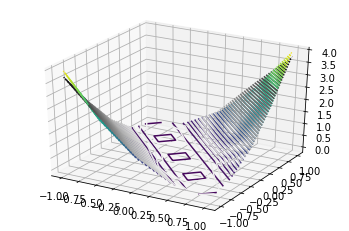

In [192]:
x = np.linspace(Nmin, Nmax, num=N)
y = np.linspace(Nmin, Nmax, num=N)

X, Y = np.meshgrid(x, y)
def fune(a,b):    
    with torch.no_grad():
        x=torch.tensor([a,b]).to(device).float()
        out=model(x).numpy()
    return out
ZZ = np.zeros(np.shape(X))

for i in range(N):
    for j in range(N):
        ZZ[i][j]=fune(X[i][j],Y[i][j])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, ZZ, 50,cmap='binary')
ax.contour3D(X, Y, Z, 50)

In [193]:
bx=model.state_dict()['fc1.weight'].numpy().T[0]
by=model.state_dict()['fc1.weight'].numpy().T[1]
c=model.state_dict()['fc1.bias'].numpy().reshape(-1)

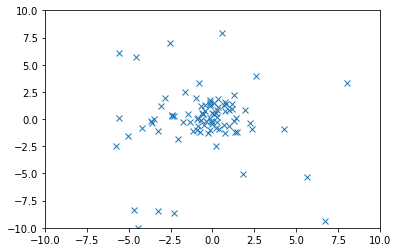

In [194]:
plt.plot(-bx/by,c/by,'x',label='data')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.savefig('twodim'+str(deltaa)+'bh.pdf')

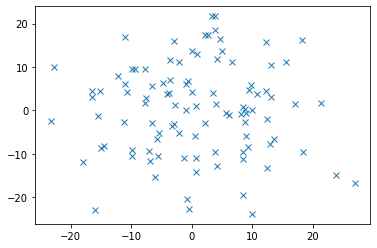

In [195]:
plt.plot(c,bx,'x',label='data')
#plt.xlim([-50, 50])
#plt.ylim([-50, 50])
plt.savefig('twodim'+str(deltaa)+'xy.pdf')

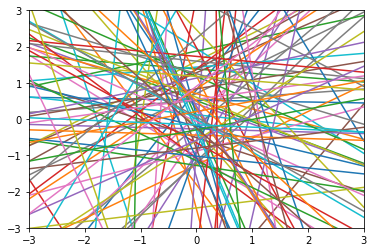

In [196]:
for i in range(len(c)):
    pb=c[i]/by[i]
    pc=-bx[i]/by[i]
    x=np.linspace(-3, 3, num=10)
    y=x*pc+pb
    plt.plot(x,y)
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.savefig('twodim'+str(deltaa)+'line.pdf')

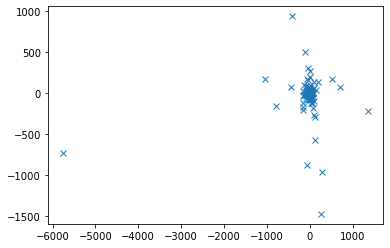

In [197]:
import sys
pb=c/by
pc=-bx/by
dataxl=[]
datayl=[]
for i in range(len(pb)):
    for j in range(i):
        px=(pb[j]-pb[i])/(pc[i]-pc[j])
        dataxl.append(px)
        datayl.append(px*pc[i]+pb[i])
        
#plt.xlim([-50, 3])
#plt.ylim([-20, 3])
plt.plot(dataxl,datayl,'x')
plt.savefig('twodim'+str(deltaa)+'sca.pdf')
        
        

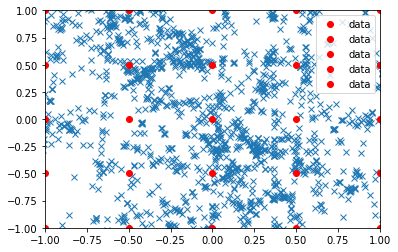

In [205]:
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.plot(dataxl,datayl,'x')
plt.plot(X,Y,'o',color='red',label='data')
plt.legend()
plt.savefig('twodim'+str(deltaa)+'scazoom.pdf')

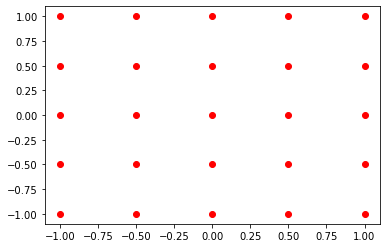

In [204]:
plt.plot(X,Y,'o',color='red',label='data')